# Pandas Introduction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gawron/python-for-social-science/blob/master/pandas/general_pandas_intro.ipynb)

**Continuity note**: *This NB combines elements of general_pandas_intro.ipynb with pandas.ipynb and supercedes both of them.**

## **Lesson 1**  

**Create Some Data** - We begin by creating our own data set for analysis. This gives us a toy example to illustrate some basic operations with.   

**Get Data** - We will learn how to read in data from the web.  The first dataset consist of baby names and the number of babies with those names in multiple years.  Flexibility 
at inputting  data in various formats is one of `pandas` strengths, though we won't
explore that much today.

**Analyze Data** - We step though some simple analytical tasks with the baby names data
and extend what we know with some other data sets.

**Present Data** - We plot some data in graphs, mostly via the very helpful plotting facilities `pandas` offers, and peek under the hood a bit at the default pandas backend
for plotting, `matplotlib`.
    

The goal of this notebook is to introduce the two main `pandas` data types, `DataFrame`  and `Series`, and to introduce to some basic
analytical tools, pivot tables, cross tabulations, and grouping. For much more detailed background on Pandas data structures, see http://pandas.pydata.org/pandas-docs/dev/dsintro.html.

The `matplotlib` library will only be needed for the data presentation (plotting) exercises. 

In [2]:
# Import all libraries needed for the tutorial

##import (library) as (give the library a nickname/alias)
import numpy as np
import pandas as pd  
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# The usual preamble when using matplotlib. 
# Most of the code we call is in pyplot.
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

This notebook was prepared with the following version
of `pandas`.   The sort of basic functionality illustrated here
shouldn;'t change much from version, but if do have issues reproducing
what's in this notebook, re-execute the next cell and see
if there's a change.  Report the version of pandas you used when reporting
an issue.

```
pandas version used 1.3.5
```

In [3]:
print(f'Pandas version {pd.__version__}')

Pandas version 1.3.5


# Create Data  

Let's start with a toy dataset, then we'll ramp up.

The data set will consist of 5 baby names and the number of births recorded for a particular year (1880, as it happens).

In [3]:
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

To merge these two lists together we will use the ***zip*** function.

In [4]:
BabyDataSet = list(zip(names,births))
print(BabyDataSet)

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


We next create a DataFrame.

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [5]:
df = DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


This `pandas` `DataFrame`
consists of 5 rows and 2 columns.  The numbers along the left edge are the index.  The general idea is that the index of a DataFrame provides a unique identifier
for each row.  The index in this toy example looks like a positional (numerical) index,
but an index does not have to be numbers and even if it is numerical, the numbers
do not have to be sequential, as we will show shortly.

**Names** and **Births** are column names, or **headers** similar to the ones found in an Excel spreadsheet or sql database.

For now, the best way to think of a DataFrame is as a 2D array  that uses keyword indexing
instead of positional indexing.  We give some examples of indexing in
the next section.

First let's illustrate some basic structural ideas of DataFrames.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   5 non-null      object
 1   Births  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


As this output suggests, the rows are indexed; each column has a data type.

The data type `object` seen  in the above info printout is the data type `pandas` for to columns containing strings; indeed the column labeled `Names` is a column whose entries are all strings.  Similarly, the column labeled `Births` is a column of name counts, so we expect `integer` to be the type and it is (`int64` is a `numpy` internal type for
integers).

Like arrays, selection may be either by rows or columns, or combinations
of both.  The column names and the index should be thought of as the keywords for
column selection and row selection, respectively.  The index is simply some sequence
of unique ids for each row, usually strings or numbers. It just happens to be a range
of numbers in this toy example. 

Illustrating `int64`, integers in numpy arrays and pandas integer-typed columns will by default be of type `np.int64`.

In [615]:
# Oridnary Python integers are not of type np.int64
isinstance(1,np.int64)

False

In [616]:
# Integers in numpy arrays are
isinstance(np.array([1])[0],np.int64)

True

# Selecting Columns

Columns in a pandas `DataFrame` are accessed by keyword (column name).

In [469]:
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

This is a column; as the output shows, the DataFrame indices persist.

This makes a DataFrame look like a dictionary with column names as keys
and columns as values.  In many contexts this is not a bad way to think about it.


The data type of a column in pandas is `Series`. 
The column name is an attribute, though it is possible for a `Series` to be lacking this
attribute:

In [17]:
df['Names'].name

'Names'

Where a `DataFrame` is the `pandas` analogue of a 2D array, a `Series` is the `pandas` analogue of a 1D array.  Hence `Series` is the data type for both rows and columns.

In [470]:
type(df['Names'])

pandas.core.series.Series

The items in the Series the column may be selected by  index:

In [103]:
df['Names'][2]

'Mary'

This demonstrates how to get to a value in a cell in a DataFrame in one expression.

# Selecting rows

`pandas` has two basic ways of selecting rows: 

1. Using the index, via the `.loc` attribute
2. Specifying some value in some column 

Let's look at selection by index first:

In [50]:
df.loc[2]

Names     Mary
Births      77
Name: 2, dtype: object

Note we **can't** write:

In [424]:
# This produces a KeyError
# df[2]

That first indexing position of a DataFrame is reserved for column names; this
`KeyError` arises because 2 is not a column name for this `df`.

Given a Dataframe and the name of a row (again, an index element does not have to be
a number), `df.loc[RowName]` returns the row:

In [427]:
df.loc[2]

Names     Mary
Births      77
Name: 2, dtype: object

As might be expected, `df.loc[2]`, being 1D, is a Series.

In [428]:
type(df.loc[2])

pandas.core.series.Series

Many of  the ideas about indexing that we learned about with ndarrays and positional
indexing carry over to keyword indexing in `pandas`.

For example, using a splice, we return a sequence of rows, and a sequence of rows is generally going to come wrapped in a DataFrame:

In [429]:
print(df.loc[2:4])
type(df.loc[2:4])

  Names  Births
2  Mary      77
3  John     578
4   Mel     973


pandas.core.frame.DataFrame

What's a little surprising here is that we got 3 rows, where from all our experience
with `numpy` slicing, we would expect 2.  This is not a bug; the motivation
is that we are not indexing by position, but by the names of elements
in the index.  More on this below when we discuss DataFrame indexes in a little more detail.

So we've seen how to get a column (1D), a row (1D), and multiple rows (2D).

Now let's look at how to get 
the value at a particular row and column position (0D): We can do as we do
with numpy 2D arrays, we specify a row and a column.

In [430]:
df.loc[2,'Names']

'Mary'

Notice this is same value we retrieved before with the following expression.

In [431]:
df['Names'][2]

'Mary'

when we were coming at things column-first.  As we will see, the `.loc` syntax 
implements the view that `DataFrames` are 2D arrays with keyword indexing;
following the convention with ndarrays, the row comes first, the column second.
The column first syntax implements the view that `DataFrames` are dictionaries
with column names as keys and columns as values.

# Boolean conditions

The basic syntax for selecting a row or rows with a fixed value in some column is

In [432]:
df[df['Names']=='Mary']

,Names,Births
2,Mary,77


What we are actually doing with such an expressions is using Boolean indexing.  What is actually returned is a DataFrame containing all the rows where the "Names" column contains
the given value.

We explain this in the next few examples.

## Selecting Rows with Boolean Conditions

Overview: The process of selecting rows by values involves two steps
1. We use a Boolean conditions on a column (a 1D `pandas` Series object) much as we did on `numpy` 1D arrays. The result is a `Boolean Series`.
2. We use the Boolean Series as a mask to select a set of rows, just as we did with arrays.

First  we place a Boolean condition on a column.  

This works just as
it did in numpy,  The condition is applied elementwise to the elements in the colomn:

In [433]:
print(df['Births'])
print()
print(df['Births'] > 500)

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

0     True
1    False
2    False
3     True
4     True
Name: Births, dtype: bool


The result is also a `Series`, just one containing Boolean values. 

In [7]:
type(df['Births'] > 500)

pandas.core.series.Series

Continuing the analogy with `numpy`: Just as we could use a 1D Boolean array 
as Boolean mask to index a
numpy 2D array, so we can use a pandas Boolean Series to mask a pandas DataFrame.

In [65]:
df.loc[df['Births'] > 500]

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


Here we use `df.loc`  for consistency with our previous examples of row-selection.

Somewhat surprisingly, given that in `df[name]`, `name` must be a column name,
`df[BooleanSeries]` is a synonym of `df.loc[BooleanSeries]`. The condition
is the same as with numpy Boolean arrays: The Boolean Series must have the same number
of rows as `df`.

Hence the following expression is the simpler, more standard
way of doing what we did in the example above.

In [63]:
df[df['Births'] > 500]

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


## Combining Conditions with Boolean operators

In `numpy` `&` is an operator that performs an elementwise `and` on two Boolean arrays,
producing a Boolean array that only has `True` wherever both the input arrays have `True`. 

In [69]:
import numpy as np
a = np.array([True,False,True])
b= np.array([False,True,True])
print('a', a)
print('b', b)
print('a & b', a&b)

a [ True False  True]
b [False  True  True]
a & b [False False  True]


Let B1 and B2 be two Boolean Series.

The  `&` operator can also be used to combine two
Boolean Series instances.  The result is a single Boolean Series that finds the rows that satisfy **both** conditions.

In [ ]:
df[(df['Births'] > 500) & (df['Births'] < 900)]

,Names,Births
3,John,578


Note that the parentheses are  **needed** here.

The problem is that `500 & 968` can be interpreted as bitwise-and of
two integers, which is a valid operation on their binary representations.

In [437]:
# Binary rep of 968 is 10 digits long
print(f'{968:010b}')
# Binary rep of 500 padded with 0 to be 10 digits long.
print(f'{500:010b}')
print(f'{500&968:010b}')
500 & 968

1111001000
0111110100
0111000000


448

Therefore, we can interpret bitwise & of an integer and
an integer Series by taking the bitwise &  of 500 and each element
in the Series, resulting in the following.

In [438]:
print(df['Births'])
500 & df['Births']

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64


0    448
1    144
2     68
3     64
4    452
Name: Births, dtype: int64

There are still other ways of interpreting how the `&` works in

```
df[df['Births'] > 500 & df['Births'] < 900].
```

The bottom line is that when this expression
is typed without parentheses, there are four legal interpretations of
what `&` is conecting,
which can be clarified by including the parentheses appropriate
for each:

1. df[(df['Births'] > 500) & (df['Births'] < 900)]  The one we want.
2. df[(df['Births'] > 500 & df['Births']) < 900] 
3. df[df['Births'] > (500 & df['Births'] < 900)] 
4. df[df['Births'] > (500 & df['Births']) < 900] 

In choosing which of these is right, the Python parser in effect
has to guess where to put the
parentheses. The first 3 are actually well formed and do not
raise an error.  Unfortunately, the parser goes for number 4,
which does cause an error.  The same error is
raised by other examples placing an array in between
two inequalities:

```
a = np.array([False, True])
# Value Error. The truth value of a Series is ambiguous. 
1 < a < 1
```

The array causes the inequality to be ambiguous,  since

```
(1 < a) < 1
1 < (a < 1)
```
produce different answers; rather than choose an interpretation,
the numpy designers have raised an exception for expressions like this, 
probably because of implementation details.

Illustrating by using the expression without parentheses:

In [612]:
# This is  Value Error
#df[df['Births'] > 500 & df['Births']< 900]

Bottom line.  When using Boolean combinations to select rows,
please include parentheses to clarify your intention.

More general lesson.  When faced with Type- and Value- Errors
that seem inexplicable to you, after checking that the values
in the expression being executed are what you want,
consider the possibility that the Python parser is finding
an interpretation of a complicated expression that
you don't want.  What can you do if that's
true?  Use parentheses. 

Another general lesson.  Use parentheses in expressions with multiple
operators.  The worst case scenario is not that there is an error,
but that there isn't.

In [457]:
3 * 2 + 5

11

Did you mean 3 * (2 + 5)?  Well, that's not what you got!

In [458]:
 3 * (2 + 5)

21

In general, getting the wrong answer in a complicated computation because of
a missing pair of parentheses is going to be an **extremely** hard debugging
task, especially if your code is sprinkled with such expressions. The moral:
put in the parentheses, even when you're sure they don't matter:

In [459]:
(3 * 2) + 5

11

As with `numpy` arrays, Series may also be combined with "bitwise not" (`~`) and "bitwise or" (`|`).

The names which were used over 500 times but not 578 times:

In [71]:
df[(df['Births'] > 500) & ~(df['Births'] == 578)]

,Names,Births
0,Bob,968
4,Mel,973


The names whose frequency does not fall between 500 and 900:

In [72]:
df[(df['Births'] < 500) | (df['Births'] > 900)]

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
4,Mel,973


## Getting values after applying Boolean conditions

Returning to our original example:

In [79]:
df[df['Names']=='Mary']

,Names,Births
2,Mary,77


We see that this is just a single Boolean condition that happens to return a single row. 

This is a 2D object, hence a DataFrame, so we can do column selection on this 

In [80]:
df[df['Names']=='Mary']['Births']

2    77
Name: Births, dtype: int64

So this expression more or less answers the question: "How many children were named 'Mary'?"

Note that what we are doing here is applying keyword indexing to a DataFrame;
consistent with all the examples above, what is returned is the `Births` column of that DataFrame, a Series of length 1 containing
the integer 77. 

In [81]:
print(type(df[df['Names']=='Mary']['Births']))

<class 'pandas.core.series.Series'>


The `Series` class provides an easy way to get to the values in the Series: the `.values`
attribute.  But this always returns an array, in this case an array of length 1.

In [82]:
df[df['Names']=='Mary']['Births'].values

array([77])

In sum, if we want to get to the integer answering the question "How many children were named 'Mary'?", we can do one of several things:

Option A:

In [83]:
df[df['Names']=='Mary']['Births'].values[0]

77

Or Option B:

In [85]:
df[df['Names']=='Mary']['Births'][2]

77

Since the sole row in this series has index 2.  This option is not very helpful since it requires knowing the index of the row whose "Names" value is "Mary", but if we already knew **that** ...

Or option C:

In [86]:
df[df['Names']=='Mary']['Births'].iloc[0]

77

The `.iloc` method does true positional indexing on the Series,
returning whatever the first element in the sequence is.  This time all
we need to know is that there is only one row whose "Name" value is "Mary".

We discuss the `.iloc` method in more detail in the next section.

### Indexes

Consider our DataFrame again.


In [73]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


We are going to discuss the way the index works.  To illustrate this,
we will use a smaller DataFrame with a subset of the original rows.

When we choose a subframe, by default we preserve the original index.

In [6]:
df2 = df[df['Births'] > 500]

In [8]:
df2

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


At this point the fact that the index is not a range of numbers but
a sequence of unique ids for the rows becomes apparent.

If we try to use positional indexing, say by selecting the second member of
the "Births" column as follows,

In [460]:
#  Key Error
#df2['Births'][1]

we get an error, because 1 is not one of the unique ids in the index. If we want to use positional indexing, we must use `.iloc`:

In [123]:
df2['Births'].iloc[1]

578

Or we can retrieve this item by its proper index value, if we know it:

In [124]:
df2['Births'][3]

578

In general pandas indexes do not need to be number ranges.  That is simply a
default strategy pandas uses when no index is supplied for a data set.

You can make the index be any sequence of names for instance

In [464]:
df2.index = ['c','b','a']

In [133]:
df2

,Names,Births
c,Bob,968
b,John,578
a,Mel,973


And now we can select a value using the new index.

In [465]:
df2['Births']['b']

578

The puzzlement about index splices can now be cleared up. An index-based
splice is never a numerical range; it returns a subsequence of the the rows 
from the row with the first index-value up through the row with the last
index-value, inclusive.

In [466]:
df2['c':'b']

,Names,Births
c,Bob,968
b,John,578


If the index values are not in sequence nothing is returned.

In [467]:
df2['b':'c']

,Names,Births


Again we can resort to position based splicing if needed:

In [468]:
df2.iloc[1:2]

,Names,Births
b,John,578


## Keyword indexing, Alignment, and Elementwise Operations

We have been at pains to emphasize that DataFrames are like 2D arrays but with
keyword indexing instead of position based indexing.

One of the consequences of this is that shape is not the decisive factor in
determining when two dataFrames can be combined by an operation.

When two `numpy` arrays  of incompatible shapes are combined, the
result is an error:

In [613]:
A = np.ones((2,2))
B = np.zeros((3,3))
# This is a Value Error
# A + B

We use an example of Jake Van der Plas's to show the same is not true of 
`pandas` DataFrames:

In [311]:
M = np.random.randint(0, 20, (2, 2))
A = pd.DataFrame(M,
                 columns=list('AB'))
A

,A,B
0,16,17
1,6,11


DataFrame A is 2x2.

In [312]:
M = np.random.randint(0, 10, (3, 3))
B = pd.DataFrame(M,
                 columns=list('ABC'))
B

,A,B,C
0,3,4,1
1,6,1,5
2,3,4,2


DataFrame B is 3x3.

Now we combine these seemingly incompatible matrices, A and B:

In [313]:
A+B

,A,B,C
0,19.0,21.0,NaN
1,12.0,12.0,NaN
2,NaN,NaN,NaN


Whereever one of the DataFrames was undefined for a column/row name,
we got a `NaN`.  More importantly, wherever we had positions that
were defined in both DataFrames, we performed addition.

The usefulness of this emerges when we we try to merge data
from two different sources, each of which may have gaps.
if we have our row and index labeling aligned, we may still be able to partially
unify the information.

What applies to operations on numbers applies equally well to operations on
strings.  Consider `df` an `df2`.

In [11]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [12]:
df2

,Names,Births
0,Bob,968
3,John,578
4,Mel,973


The two DataFrames share column names and some index names; one column contains numbers, the
other strings.

The + operation --- call it addition --- is defined on both strings and numbers and will apply to any columns
that can be aligned; so examine the 0, 3, 4 rows in the output of the next cell.  Note that both 
columns undergo addition in those rows, while the unshared rows are NaN'ed.

In [10]:
df2 + df

,Names,Births
0,BobBob,1936.0
1,NaN,NaN
2,NaN,NaN
3,JohnJohn,1156.0
4,MelMel,1946.0


This kind of behavior follows from being consistent about keyword indexing and from allowing
elementwise operations when possible:

In [18]:
df['Names'] + 'x'

0        Bobx
1    Jessicax
2       Maryx
3       Johnx
4        Melx
Name: Names, dtype: object

It is worth pointing out that pandas also tries to allow the string analogue of ufunc's (functions
that can be applied elementwise to arrays) whenever possible.
Typically, this requires invoking a "StringMethod" accessor on the Series instance.

For example, although `df['Names'].lower()` is an error,
we can acomplish what we're after here, lowercasing every element in the column, 
by first calling the `.str` method,
then `.lower()`.

The `.str()` method provides an accessor to string methods which will apply elementwise:

In [16]:
df['Names'].str

In [7]:
df['Names'].str.lower()

0        bob
1    jessica
2       mary
3       john
4        mel
Name: Names, dtype: object

We can also use elementwise string operations to do Boolean indexing:

In [8]:
df[df['Names'].str.startswith('M')]

,Names,Births
2,Mary,77
4,Mel,973


This extends to elementwise indexing of the strings in a column;

The following expression returns a Series of first elements, preserving the 
original indexing.

In [17]:
df['Names'].str[0]

0    B
1    J
2    M
3    J
4    M
Name: Names, dtype: object

NaNs will as usual give rise to more NaNs:

In [20]:
(df + df2)['Names'].str[0]

0      B
1    NaN
2    NaN
3      J
4      M
Name: Names, dtype: object

## Analyze Data

To find the most popular name or the baby name with the highest birth rate, we can do one of the following.  

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

We illustrate these in turn.

Next we create a new DataFrame, sorting the rows **according to values in a particular column**.
This column is called by **by** argument of the `.sort_values()` method.

In [473]:
# Method 1 (old pandas)
Sorted_df = df.sort_values('Births', ascending= False)
Sorted_df

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


To get to the actual name that is the most popular one:

In [145]:
Sorted_df.iloc[0]['Names']

'Mel'

Of course if all we were interested in was the count of the most popular name, we could do:

In [ ]:
# Method 2:
df['Births'].max()

973

Note that although we can just as easily sort a column (Series) as a DataFrame,
it will be more work to find the associated value in another column.

Illustrating:

In [474]:
print(df['Births'])
SortedBirths = df['Births'].sort_values(ascending=False)
print(SortedBirths)

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64
4    973
0    968
3    578
1    155
2     77
Name: Births, dtype: int64


Now to get the most popular name, we must retrieve the first element in the sorted index, and then we can use that index element to get the name:

In [475]:
print(SortedBirths.index[0])
df.loc[SortedBirths.index[0],'Names']

4


'Mel'

## Loading Data:  A more realistic example

In [5]:
import pandas as pd
years = list(range(1880,2011))
pieces = []
columns = ['name','sex','births']

url = 'https://raw.githubusercontent.com/gawron/'\
       'python-for-social-science/master/pandas/names/'
for year in years:
    path = f'{url}yob{year:d}.txt'
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

If you were successful the next cell should evaluate to `True`.  Please re-evaluate the next cell to check.

In [8]:
len(names)  == 1_690_784

True

In [9]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


We first build the list `pieces` in the `for`-loop; `pieces` is a list of DataFrames. 
As we process each data file, we keep track of the year 
by adding a `'year'` column to the DataFrame.
We then concatenate that list into a single large frame called `names`, ignoring the indexes in the old frames.  We ignore the indexes because they will all be number ranges starting with 0, and rather than have a large number of rows indexed `1` (1 from each year), we renumber them all.

Think about why it's hard to build the list `pieces` with a list comprehension instead of  the way it's done in the above cell.
Notice the following doesn't work.  Python requires an expression
as the first component of a list comprehension.  One reason for this is that list comprehensions are supposed to improve readability.  Complex sequences of commands don't do that, and the `for`-loop above is much more understandable.

```
pieces = [f=pd.read_csv('names/yob{0:d}.txt'.format(year),names=columns);
          f['year']=year; f
          for year in years]
```

The new DataFrame has 1,690,784 rows and 4 columns.

In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## Selection: Selecting parts of Pandas data frames

Having created a much larger Pandas DataFrame with babynames data,  we return to selecting data.   

In [11]:
names1881 = names[names['year'] == 1881]

In [12]:
names1881

,name,sex,births,year
2000,Mary,F,6919,1881
2001,Anna,F,2698,1881
2002,Emma,F,2034,1881
2003,Elizabeth,F,1852,1881
2004,Margaret,F,1658,1881
...,...,...,...,...
3930,Wiliam,M,5,1881
3931,Wilton,M,5,1881
3932,Wing,M,5,1881
3933,Wood,M,5,1881


The first ten rows.  

In [13]:
print(type(names1881[:10]))
names1881[:10]

<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2000,Mary,F,6919,1881
2001,Anna,F,2698,1881
2002,Emma,F,2034,1881
2003,Elizabeth,F,1852,1881
2004,Margaret,F,1658,1881
2005,Minnie,F,1653,1881
2006,Ida,F,1439,1881
2007,Annie,F,1326,1881
2008,Bertha,F,1324,1881
2009,Alice,F,1308,1881


Note that index starts with 2000 because we have retrieved a subset of
the rows in the `names` data, preserving the indexing.

Retrieve the gender column, and display the last part.

In [14]:
names1881['sex'].tail()

3930    M
3931    M
3932    M
3933    M
3934    M
Name: sex, dtype: object

A Boolean test, returning a DataFrame that has one column, a column of Booleans.

This shows the 1881 names  are gender sorted, with the female names occupying approximately the last half of the data.

In [15]:
print(type(names1881['sex']=='F'))
names1881['sex']=='F'

<class 'pandas.core.series.Series'>


2000     True
2001     True
2002     True
2003     True
2004     True
        ...  
3930    False
3931    False
3932    False
3933    False
3934    False
Name: sex, Length: 1935, dtype: bool

Using the analogue of fancy-indexing in
numpy arrays (a list of indices selects a list of rows), you can pick out a subdata frame with a subset of columns, using a list of column names:

In [481]:
print(type(names1881[['sex','births']]))
names1881[['sex','births']]

<class 'pandas.core.frame.DataFrame'>


,sex,births
2000,F,6919
2001,F,2698
2002,F,2034
2003,F,1852
2004,F,1658
...,...,...
3930,M,5
3931,M,5
3932,M,5
3933,M,5


The indexing conventions we observed in the toy example work here.

indexing a series with a valid index member yields the value at that
position in the series:

In [483]:
names1881['sex'][2000]


'F'

That's why a Series is referred to as an *ordered set* in the Pandas documentation.  There are no duplicate names, as with dictionary keys, but there is also ordering.

As with the toy example, you can also create a Boolean series containing Booleans.  The following cell creates such a series and prints out the tail:

In [484]:
 (names1881['name']=='Lee').tail()

3930    False
3931    False
3932    False
3933    False
3934    False
Name: name, dtype: bool

Then you can use that series as a mask to create to create a sub data frame of the original data frame that has only the rows with name `"Lee"`.

In [22]:
print(type(names1881['name']=='Lee'))
lee_rows = names1881[names1881['name']=='Lee']
print(type(lee_rows))
lee_rows

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2258,Lee,F,39,1881
2981,Lee,M,342,1881


So `lee_rows` is a `DataFrame` containing only the rows for people named "Lee".  

This example also shows why we shouldn't use the `name` column to index the data.  There are names that occur in two rows, because they are both male and female names.

You can also pick out a sub data frame with just the female names. We do that and query the "sex" column to show we've got a `female_rows` `DataFrame` with about half the data of the original `DataFrame`.

In [489]:
print(type(names1881['sex']=='F'))
female_rows1881 = names1881[names1881['sex']=='F']
print(type(female_rows1881))
female_rows1881.tail()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,name,sex,births,year
2933,Tinie,F,5,1881
2934,Tiny,F,5,1881
2935,Vernon,F,5,1881
2936,Verona,F,5,1881
2937,Viney,F,5,1881


Since there are no male rows in `female_rows1881`, this is an empty DataFrame:

In [377]:
female_rows1881[female_rows1881['sex'] == 'M']

,name,sex,births


In [201]:
len(female_rows1881)

938

In [202]:
len(names1881)

1935

#### The .value_counts( ) method

If learning the number of female names and the number of all names was our goal, we could have gotten much the same information by using the Series method
`.value_counts()`.  If called by Series S, this method creates a new Series index by the distinct values of S: for each row the value is the counts of how many times that value occurred:

In [486]:
names1881['sex'].value_counts()

M    997
F    938
Name: sex, dtype: int64

The sum of the value counts equals the number of rows in `names1881`:

In [487]:
names1881['sex'].value_counts().sum()

1935

In [490]:
len(female_rows1881)/len(names1881)

0.4847545219638243

It turns out Series have a plot method; applying that method to the value_counts  Series, we get:

<AxesSubplot:title={'center':'1881: Number of Names by Gender'}>

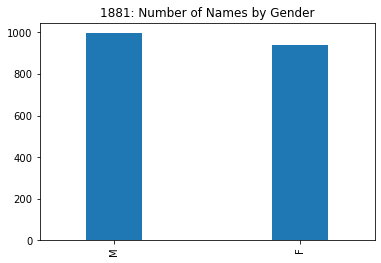

In [491]:
names1881['sex'].value_counts().plot(kind='bar',width=.3,
                                     title='1881: Number of Names by Gender')

This is our first very simple example of analytical strategy we will use often with `pandas`:

1. Use one of `pandas` analytical tools to transform the data into a new DataFrame or Series.
2. Exploit the fact that the transformed data has restructured the index and the columns to make a plot summarizing our analysis.

Translating this code to the entire `names` data set (1881-2010), we see an interesting change.

In [492]:
print(type(names['sex']=='F'))
female_rows = names[names['sex']=='F']
len(female_rows)/len(names)

<class 'pandas.core.series.Series'>


0.5937984982114806

<AxesSubplot:title={'center':'1881--2007: Number of Names by Gender'}>

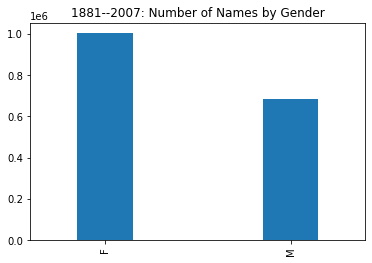

In [493]:
names['sex'].value_counts().plot(kind='bar',width=.3, 
                                 title='1881--2007: Number of Names by Gender')

We see the female rows occupy nearly 60% of the data, meaning that some time
after 1881 the diversity of female names overtook and greatly surpassed
that of male names.

#### Cross-tabulation

To introduce cross-tabulation we will explore the fact we just discovered, that
the proportion of female names increases over time


Before doing that, let's try a simple exercise.  If you already know how to do cross-tabulation in `pandas`,
feel free to use it.  If you don't know how to do cross-tabulation in `pandas`, or perhaps
what cross-tabulation is, you should be able tot do the problem using your general knowledge of
Python.

Plot the proportion of all names that were female names year by year to trace the 
year by year change.   Hint: create a sequence containing the numbers you need (proportion of female names in each year).  Then create a pandas DataFrame
`female_names_by_year` with two columns ('Year' and 'Proportion Female Names').  Then
do

```
female_names_by_year.plot('Year','Proportion Female Names')
```
Note that for this exercise a line 
connecting the proportion values for each year, which is the default plot type (kind = "line"), is a better choice than a bar plot (kind = "bar"). 

Optionally: Draw a horizontal line at 50% to help the viewer
see where the number of female names is greater than that of male names.
The births by year plotting example  with `matplotlib` below may help, since this involves
some knowledge of `matplotlib`.

Two answers are provided several cells below.  

They are not the only possible answers.

The answer is surprising.  Female name diversity is not as simple as a continuously rising 
trend.

#### Solution 1

The following code is correct, and quite reasonable given what we've learned so far in this notebook but unnecessarily complicated.  We show a simpler solution
below which uses cross-tabulation.

Sine ``pandas`` provides some very flexible tools for makinga ``DataFrame`` from a dictionary, we start with a dictionary comprehension
that makes a dictionary with the data we want.

In [98]:
female_names = names[names['sex']=='F']
year_range = range(1881,2008)

def get_prop_female_names(year):
    # Given a year return the proportion female names that year
    return (female_names['year'] == year).sum()/\
                          (names['year'] == year).sum()

result = {year: get_prop_female_names(year) for year in year_range}


Making a DataFrame so we can use its plotting method.

<AxesSubplot:>

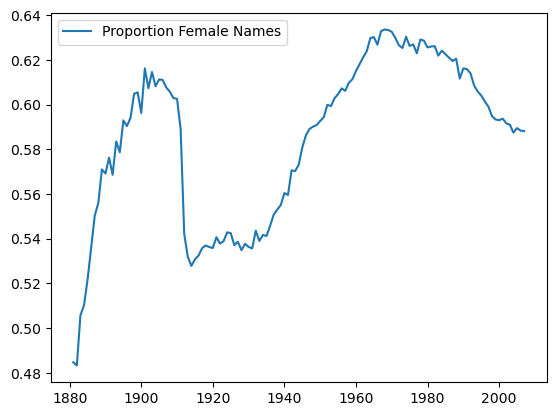

In [99]:
female_names_by_year = \
      pd.DataFrame.from_dict(result,orient='index',
                             columns=['Proportion Female Names'])         
female_names_by_year.plot()

Here's the ``DataFrame`` we used:

In [102]:
female_names_by_year[:5]

,Proportion Female Names
1881,0.484755
1882,0.483310
1883,0.505758
1884,0.510231
1885,0.521796


Second plot: Adding The 50% line (bringing in a little knowledge of matplotlib):

<AxesSubplot:title={'center':'Percent Female Names by Year'}, xlabel='Year', ylabel='Proportion Female Names'>

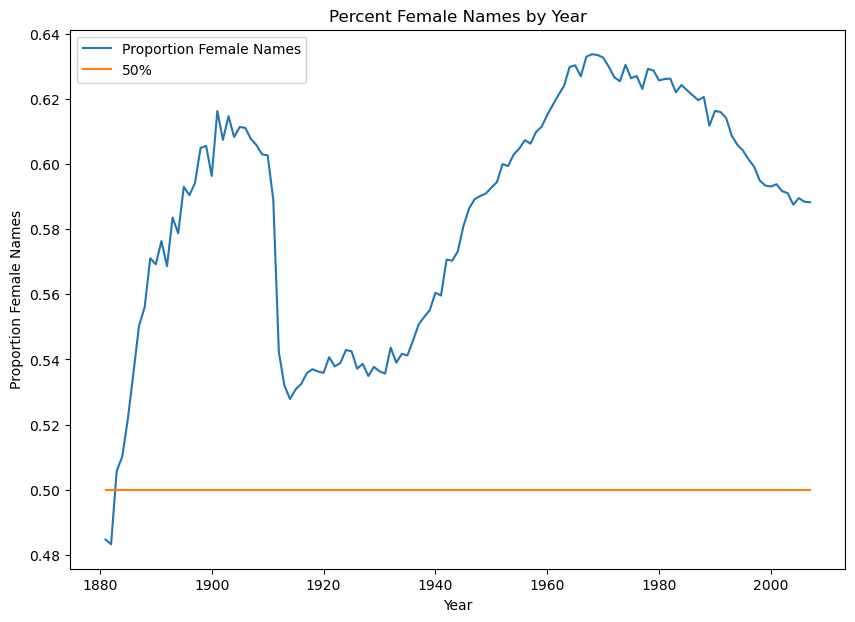

In [104]:
# Creating axis for plot and secondary line, so a line can be added
from matplotlib import pyplot as plt

fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
# Adding 50% line
female_names_by_year['50%'] = .5 
# Including axis labels, title, using ax1
female_names_by_year.plot(xlabel='Year',ylabel='Proportion Female Names',
                           title='Percent Female Names by Year',
                           ax=ax1,figsize=(10,7))

#### Solution 2

A much simpler solution, using the `pandas` `crosstab` function:

In [106]:
# This version gives percentages
gender_counts_by_year = pd.crosstab(names['sex'],names['year'],normalize='columns')
gender_counts_by_year

# This version would give us counts rather than percentages
# gender_counts_by_year = pd.crosstab(names['sex'],names['year'])

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
sex,,,,,,,,,,,,,,,,,,,,,
F,0.471,0.484755,0.48331,0.505758,0.510231,0.521796,0.535953,0.550358,0.556017,0.571042,...,0.593765,0.591646,0.59104,0.587513,0.589516,0.588384,0.588252,0.583214,0.581556,0.582127
M,0.529,0.515245,0.51669,0.494242,0.489769,0.478204,0.464047,0.449642,0.443983,0.428958,...,0.406235,0.408354,0.40896,0.412487,0.410484,0.411616,0.411748,0.416786,0.418444,0.417873


Note that `gender_counts_by_year` is a `DataFrame`; the index is the two genders.

It includes percentages (by column) because we passed `crosstab` the parameter
`normalize="columns"`.

This means `gender_counts_by_year.loc['F']` is a DataFrame row, 
that is a Series whose index is the column sequence.

In [107]:
f_row = gender_counts_by_year.loc['F']
f_row

year
1880    0.471000
1881    0.484755
1882    0.483310
1883    0.505758
1884    0.510231
          ...   
2006    0.588384
2007    0.588252
2008    0.583214
2009    0.581556
2010    0.582127
Name: F, Length: 131, dtype: float64

Since a Series has a plot method,  we have the following simple option,
which leaves out some plotting details.

<AxesSubplot:xlabel='year'>

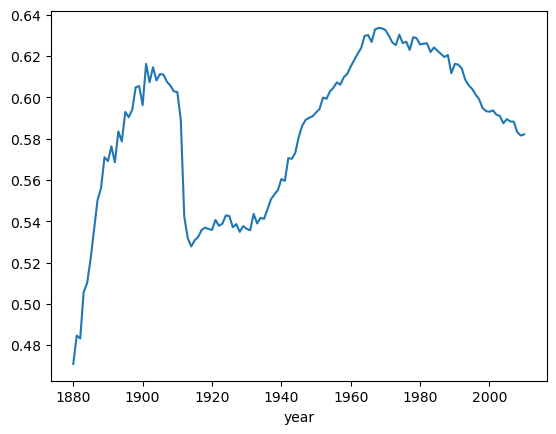

In [69]:
f_row.plot()

More satisfactory plotting code for soln 2 (with 50% line)

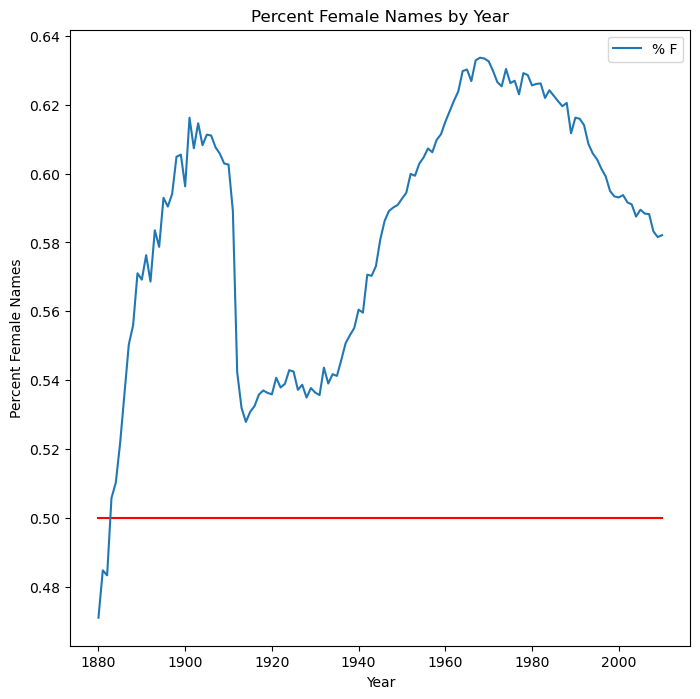

In [108]:
import numpy as np

# Creating axis for plot and secondary line, so a line can be added
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
years = f_row.index
(num_years,) = f_row.shape
# Adding 50% line
point_five_line = .5 * np.ones(num_years)
ax1.plot(years,point_five_line,color='r',label='50%')
# Including axis labels, title, using ax1, adding legend
_splots = f_row.plot(ylabel='Percent Female Names',xlabel='Year',
                      title='Percent Female Names by Year',ax=ax1,label='% F',legend=True)

The lesson of solution 2: If what you're doing is a pretty standard piece of
data analysis, chances are good that `pandas` includes a simple way
of doing it.

Read some documentation to find potential tools.  Consult stackoverflow for code
snippets and pointers on where to look in the doumentation.

# Complaints: a new dataset

We're going to use a new dataset here, to demonstrate how to deal with datasets with few numerical attributes.

The next cell provides a URL for a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [66]:
import os.path
#How to break up long strings into multiline segments
#Note the use of "line continued" character \
data_url = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/'\
'pandas/datasets/311-service-requests.csv'

In [68]:
import pandas as pd
# Some columns are of mixed types.  This is OK.  But we have to set 
# low_memory=False
complaints = pd.read_csv(data_url,low_memory=False)

In [327]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      111069 non-null  int64  
 1   Created Date                    111069 non-null  object 
 2   Closed Date                     60270 non-null   object 
 3   Agency                          111069 non-null  object 
 4   Agency Name                     111069 non-null  object 
 5   Complaint Type                  111069 non-null  object 
 6   Descriptor                      110613 non-null  object 
 7   Location Type                   79022 non-null   object 
 8   Incident Zip                    98807 non-null   object 
 9   Incident Address                84441 non-null   object 
 10  Street Name                     84432 non-null   object 
 11  Cross Street 1                  84728 non-null   object 
 12  Cross Street 2  

Note that the `df.info()` summary shows how many non-null values there are in each column,
so that you can see there are some columns with very few meaningful entries.

You can see null-entries in the first 5 rows: They are the entries printed out as `NaN`.

`NaN` is short for "Not a Number".  It is the standard representation of an undefined result for a numerical calculation.  Here it is being used to mean "No data entered here";
`NaN` is very commonly used with this meaning in pandas, even in columns that do not have a numerical type; we could, alternatively,  use Python `None` for this purpose.

In [328]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


# 2.2 Selecting columns and rows

As before we can select a column, by indexing with the name of the column:

In [253]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

As above we select rows by constructing Boolean Series:

In [74]:
nypd_bool = (complaints['Agency'] == 'NYPD')
nypd_bool[:10]

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7     True
8     True
9     True
Name: Agency, dtype: bool

We construct a sub frame that has only Police Department complaints.

In [75]:
nypd_df = complaints[nypd_bool]

But there are 20 kinds of PD complaints in this data.

In [77]:
complaint_set = nypd_df['Complaint Type'].unique()
complaint_set

array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Blocked Driveway', 'Noise - House of Worship',
       'Homeless Encampment', 'Noise - Park', 'Drinking', 'Panhandling',
       'Derelict Vehicle', 'Bike/Roller/Skate Chronic', 'Animal Abuse',
       'Traffic', 'Vending', 'Graffiti', 'Posting Advertisement',
       'Urinating in Public', 'Disorderly Youth', 'Illegal Fireworks'],
      dtype=object)

So we limit it further:

In [262]:
il_df = nypd_df[nypd_df['Complaint Type'] == 'Illegal Parking']

More constraints means progressively smaller DataFrames:

In [266]:
(len(complaints), len(nypd_df), len(il_df))

(111069, 15295, 3343)

### Attribute syntax versus indexing syntax

Note that columns can also be specified using instance/attribute syntax, as in:

In [276]:
complaints.Agency

0          NYPD
1          NYPD
2          NYPD
3          NYPD
4         DOHMH
          ...  
111064      DPR
111065     NYPD
111066     NYPD
111067     NYPD
111068     NYPD
Name: Agency, Length: 111069, dtype: object

But also note that doesnt work for the column name `Complaint Type`; because this has a space,
trying to use it as an attribute raises a `SyntaxError`: No Python name can contain
a space; that includes attribute names.

In [279]:
complaints.Complaint Type

SyntaxError: invalid syntax (2805497044.py, line 1)

So the general Python syntax for indexing a container (square bracket syntax) 

```
complaints['Complaint Type']
```

is the one to remember.

The indexing syntax is also the one that extends to accommodate
selection of multiple columns, using the fancy-indexing convention from `numpy`
(index via an arbitrary sequence of indices).

In [ ]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


Narrowing down the set of columns is a common step, especially important
when performing further analytical caulculations like pivot tables.

### Using crosstab with the complaints data 

**Complaints Problem A**: For each complaint type, find its frequency in each borough.

This is a cross-tabulation question: We use `crosstab` to get the joint distribution counts for  two attributes.  

In [290]:
pd.crosstab(complaints['Agency'],complaints['Borough'])

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Agency,,,,,,
3-1-1,0,8,11,12,1,60
CHALL,0,0,0,0,0,77
COIB,0,0,0,0,0,1
DCA,155,357,358,284,36,215
DEP,791,2069,3419,1916,690,12
DFTA,4,5,3,3,0,7
DHS,6,31,54,8,0,2
DOB,358,775,477,1257,147,0
DOE,17,26,24,15,7,8


**Elaboration of Complaints Problem A**:  For each complaint type, find its frequency in each borough. 
Also give the total number of complaints by borough and by complaint type.

In [329]:
ct_agency_borough = pd.crosstab(complaints['Agency'],complaints['Borough'],margins=True)
ct_agency_borough

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified,All
Agency,,,,,,,
3-1-1,0,8,11,12,1,60,92
CHALL,0,0,0,0,0,77,77
COIB,0,0,0,0,0,1,1
DCA,155,357,358,284,36,215,1405
DEP,791,2069,3419,1916,690,12,8897
DFTA,4,5,3,3,0,7,22
DHS,6,31,54,8,0,2,101
DOB,358,775,477,1257,147,0,3014
DOE,17,26,24,15,7,8,97


Now `ct_agency_borough` contains both an `'All'` column (containing the
sum of the values in each row) and an `'All'` row (containing the sum of
the values for each column).

Note that as long as there are no rows missing an `'Agency'` or `'Borough'` (there aren't), then `ct_agency_borough['All']['All']` is the total number of rows in `complaints`.

In [330]:
print(len(complaints))
print(ct_agency_borough['All']['All'])

111069
111069


Here is the transpose of the above DataFrame.  
In other words, the answer to the query: For each borough, find the frequency of its complaints for each complaint type.

In [291]:
pd.crosstab(complaints['Borough'],complaints['Complaint Type'])

Complaint Type,APPLIANCE,Adopt-A-Basket,Agency Issues,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,108,0,0,40,162,0,17,17,12,0,...,8,2,20,23,17,15,13,278,0,0
BROOKLYN,175,0,0,125,0,4,15,29,16,6,...,10,12,61,35,8,31,28,517,1,0
MANHATTAN,89,3,0,203,2,2,23,60,18,0,...,11,10,8,119,46,21,26,961,1,0
QUEENS,67,0,0,76,0,0,16,30,5,1,...,12,6,29,49,13,53,12,552,0,1
STATEN ISLAND,6,0,0,15,0,2,13,7,1,0,...,0,0,25,3,6,10,10,326,0,0
Unspecified,0,0,174,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,2,0,0


**Complaints Problem B**:  What's the noisiest borough? A little preprocessing is required.  Then we
can turn this into a cross tabulation of a restricted set of complaint types and borough.

In [593]:
# Apply a function that returns True if a string starts with 'noise'
# to every element of the Complaint Type column, producing a Boolean Series
# Roughly equivalent to 
# boolean_series = pd.Series([ct.startswith('Noise') 
#                             for ct in complaints['Complaint Type']])
boolean_series = complaints['Complaint Type'].apply(lambda x: x.startswith('Noise'))
complaints_noise = complaints[boolean_series]
complaints_noise[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,CROSSBAY BOULEVARD,PITKIN AVENUE,VAN WICKLEN ROAD,NaN,NaN,ADDRESS,OZONE PARK,NaN,Precinct,Closed,10/31/2013 09:44:19 AM,10/31/2013 01:58:49 AM,10 QUEENS,QUEENS,1027776.0,184076.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"


So what's the noisiest borough?  The answer is no surprise to those who've been in NYC.

In [338]:
ct_noise = pd.crosstab(complaints_noise['Borough'],complaints_noise['Complaint Type'],
                       margins=True)
ct_noise.sort_values(by = 'All',ascending=False)

Complaint Type,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,All
Borough,,,,,,,,
All,3321,2578,99,67,191,1928,750,8934
MANHATTAN,1848,1140,66,16,91,917,255,4333
BROOKLYN,767,775,23,23,60,456,237,2341
QUEENS,418,451,9,15,27,226,130,1276
BRONX,168,136,1,11,9,292,102,719
STATEN ISLAND,115,76,0,2,4,36,25,258
Unspecified,5,0,0,0,0,1,1,7


**Complaints problem C**

Find the complaint counts for three agences ('DOT', "DOP", 'NYPD').

First Produce a DataFrame containing only the three agencies DT, DOP and NYPD.  This part is easy.

In [587]:
pt00 = complaints[complaints.Agency.isin(['DOT', "DOP", 'NYPD'])]

The frame `pt00` now restricts us to three agencies.

Second, use `pt00` to create a DataFrame or Series
whose index is the complaint types
and whose three columns are the Three Agencies.
Each  cell should contain the count of the complaint
type of that row and the agency of that column.
For example, the number in the `'Animal Abuse'` row in
the `'NYPD'` column should be the number of NYPD complaints  about
animal abuse (which happens to be 164).

A pause to think about this.

In [591]:
three = ['DOT', "DOP", 'NYPD']
pt00 = complaints[complaints.Agency.isin(three)]
pd.crosstab(pt00['Complaint Type'], pt00['Agency'])

Agency,DOP,DOT,NYPD
Complaint Type,,,
Agency Issues,0,20,0
Animal Abuse,0,0,164
Bike Rack Condition,0,7,0
Bike/Roller/Skate Chronic,0,0,32
Blocked Driveway,0,0,4590
Bridge Condition,0,20,0
Broken Muni Meter,0,2070,0
Bus Stop Shelter Placement,0,14,0
Compliment,0,1,0


## Analysis: What's the most common complaint type?

First of all, this is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [421]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

Since `complaints_counts` is a  Series (the complaint types are the index) ordered by number of complaints,  we can plot the numbers for the top complaint types, demonstrating visually what an outlier `Heating` is (Oh those NYC winters!).

<AxesSubplot:>

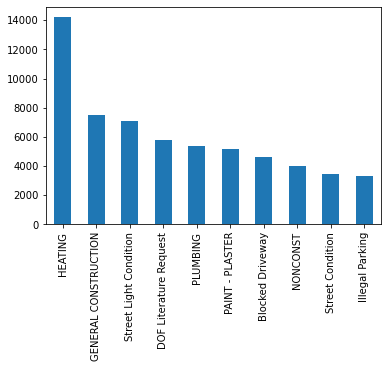

In [422]:
complaint_counts[:10].plot(kind='bar')

### Crosstab understanding exercise

Find the distribution of complaint Statuses.  That is, write
an expression that produces a DataFrame or Series whose index
is the seven possible complaint Statuses  and whose
values are the number of complaints with each Status.

The solution is given a few cells down.  

To help you check your solution, here are the seven complaint statuses.

In [161]:
set(complaints['Status'])

{'Assigned',
 'Closed',
 'Email Sent',
 'Open',
 'Pending',
 'Started',
 'Unassigned'}

In [108]:
sc = complaints['Status'].value_counts()
sc

Closed        57165
Open          43972
Assigned       6189
Pending        3165
Started         447
Email Sent      129
Unassigned        2
Name: Status, dtype: int64

## Using groupby

Grouping is a fundamental data analysis operation.  For example, it is the first step
in doing a cross-tabulation.  In part two of the pandas intrdoction, we will
see it is also the first step in creating a pivot table.  It is
useful to look at some of the functionality pandas provides for direct access
to grouping, and helpful to look at some examples to
see what splitting/grouping really is.

Let's use a new dataset to illustrate, because it has some very natural
groupings.

In [82]:
nba_file_url = 'https://gawron.sdsu.edu/python_for_ss/course_core/data/nba.csv'
nba_df = pd.read_csv(nba_file_url)

Each row contains information about one current player. The team rosters are listed in alphabetical order of team name, with the players in alphabetical order by name
within the teams.

In [83]:
nba_df[:5]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


We are going to use it to find out about team salaries, height by position
and weight by position.

We group the rows by team and then show the alphabetically first player in each team.

In [84]:
gt = nba_df.groupby('Team')
# First member of each group
gt.first()

,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,Kent Bazemore,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
Boston Celtics,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Brooklyn Nets,Bojan Bogdanovic,44.0,SG,27.0,6-8,216.0,Oklahoma State,3425510.0
Charlotte Hornets,Nicolas Batum,5.0,SG,27.0,6-8,200.0,Virginia Commonwealth,13125306.0
Chicago Bulls,Cameron Bairstow,41.0,PF,25.0,6-9,250.0,New Mexico,845059.0
Cleveland Cavaliers,Matthew Dellavedova,8.0,PG,25.0,6-4,198.0,Saint Mary's,1147276.0
Dallas Mavericks,Justin Anderson,1.0,SG,22.0,6-6,228.0,Virginia,1449000.0
Denver Nuggets,Darrell Arthur,0.0,PF,28.0,6-9,235.0,Kansas,2814000.0
Detroit Pistons,Joel Anthony,50.0,C,33.0,6-9,245.0,UNLV,2500000.0


Next we use the grouping object to retrieve all rows for a particular group:

In [26]:
# A particular group
gt.get_group('Utah Jazz')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
442,Trevor Booker,Utah Jazz,33.0,PF,28.0,6-8,228.0,Clemson,4775000.0
443,Trey Burke,Utah Jazz,3.0,PG,23.0,6-1,191.0,Michigan,2658240.0
444,Alec Burks,Utah Jazz,10.0,SG,24.0,6-6,214.0,Colorado,9463484.0
445,Dante Exum,Utah Jazz,11.0,PG,20.0,6-6,190.0,NaN,3777720.0
446,Derrick Favors,Utah Jazz,15.0,PF,24.0,6-10,265.0,Georgia Tech,12000000.0
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6-8,226.0,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0


Note that the benefit of the grouping object is that it makes various 
group member by group member operatations operations easier.

If all we were interested in was constructing DataFrames limited to one team,
we could just as easily have been done that with:

In [27]:
nba_df[nba_df['Team'] == 'Utah Jazz']

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
442,Trevor Booker,Utah Jazz,33.0,PF,28.0,6-8,228.0,Clemson,4775000.0
443,Trey Burke,Utah Jazz,3.0,PG,23.0,6-1,191.0,Michigan,2658240.0
444,Alec Burks,Utah Jazz,10.0,SG,24.0,6-6,214.0,Colorado,9463484.0
445,Dante Exum,Utah Jazz,11.0,PG,20.0,6-6,190.0,NaN,3777720.0
446,Derrick Favors,Utah Jazz,15.0,PF,24.0,6-10,265.0,Georgia Tech,12000000.0
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
448,Gordon Hayward,Utah Jazz,20.0,SF,26.0,6-8,226.0,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0


But suppose we were interested in comparing various averages by team. Suppose
for example we were interested in the correlation between team age and team salary.
Then it would be convenient to use our team grouping instance and do:

In [91]:
# scipy.stats has a number of standard statistical tools.
# Spearman's correlation
#from scipy.stats import spearmanr
from scipy.stats import pearsonr
mean_age_by_team = gt['Age'].mean().sort_values(ascending=False)
print(mean_age_by_team)
print()
mean_salary_by_team = gt['Salary'].mean().sort_values(ascending=False)
print(mean_salary_by_team)
print()
(corr,significance)  = pearsonr(mean_age_by_team,mean_salary_by_team)
print(f'Correlation {corr:.3f} Significance:{significance:.1e}')

Team
San Antonio Spurs         31.600000
Dallas Mavericks          29.733333
Cleveland Cavaliers       29.533333
Los Angeles Clippers      29.466667
Miami Heat                28.933333
Memphis Grizzlies         28.388889
Atlanta Hawks             28.200000
Washington Wizards        27.866667
Golden State Warriors     27.666667
Los Angeles Lakers        27.533333
Chicago Bulls             27.400000
Oklahoma City Thunder     27.066667
New York Knicks           27.000000
New Orleans Pelicans      26.894737
Houston Rockets           26.866667
Sacramento Kings          26.800000
Indiana Pacers            26.400000
Minnesota Timberwolves    26.357143
Detroit Pistons           26.200000
Charlotte Hornets         26.133333
Toronto Raptors           26.133333
Phoenix Suns              25.866667
Denver Nuggets            25.733333
Brooklyn Nets             25.600000
Orlando Magic             25.071429
Portland Trail Blazers    25.066667
Boston Celtics            24.733333
Philadelphia 76ers     

We see that age and salary are highly correlated.  Older teams do make more.

Note what we did. 


1.  **Splitting**: We created `gt` by using the `'Team'` column to split the players into groups. 
2.  **Applying**: We applied  a so-called **aggregation** function to `gt` using two different value columns (`'Age'` and `'Salary'`).  
3.  **Combining**: In both cases, the results were combined into a Series.

These three steps occur again and again in data analysis.  They are known as the **split/apply/combine**
strategy.  Although we will soon learn various ways of combining the three steps in one function, 
the advantage of doing the first step with `groupby` here was that we used the same grouping for two 
different application steps.

So `groupby` is more useful when the same grouping can serve multiple purposes.
Grouping also gets more interesting when it's done by more than one attribute at a time.
Let's try  grouping by team and position.

In basketball each team puts five players
on the court at any given time.   Although 
the specialized roles of the players on the court are changing,
classically a player plays one of five positions: 

1. Point Guard (PG)
2. Shooting Guard (SG)
3. Small Forward (SF)
4. Power Forward (PF)
5. Center (C).

This data set assigns each player to one of these five positions. 
A team will typically have multiple players assigned to any
given position.

In [40]:
gtp = nba_df.groupby(['Team','Position'])
# Show the first entry for each team/position pair
gtp.first()

Name  Number   Age Height  Weight               College      Salary
Team               Position                                                                                 
Atlanta Hawks      C               Al Horford    15.0  30.0   6-10   245.0               Florida  12000000.0
                   PF          Kris Humphries    43.0  31.0    6-9   235.0             Minnesota   1000000.0
                   PG         Dennis Schroder    17.0  22.0    6-1   172.0           Wake Forest   1763400.0
                   SF           Kent Bazemore    24.0  26.0    6-5   201.0          Old Dominion   2000000.0
                   SG        Tim Hardaway Jr.    10.0  24.0    6-6   205.0              Michigan   1304520.0
...                                       ...     ...   ...    ...     ...                   ...         ...
Washington Wizards C            Marcin Gortat    13.0  32.0   6-11   240.0  North Carolina State  11217391.0
                   PF             Drew Gooden    90.0  34.0   6-10   250.0                Kansas   3300000.0
                   PG          Ramon Sessions     7.0  30.0    6-3   190.0                Nevada   2170465.0
                   SF            Jared Dudley     1.0  30.0    6-7   225.0        Boston College   4375000.0
                   SG           Alan Anderson     6.0  33.0    6-6   220.0        Michigan State   4000000.0

[149 rows x 7 columns]

`gtp_first` is a DataFrame with a **double index** (an index with two levels) so we can select an index member from the first level to get a set of rows.

The alphabetically first players on the Boston Celtics, by position.

In [41]:
#
gtp.first().loc['Boston Celtics']

,Name,Number,Age,Height,Weight,College,Salary
Position,,,,,,,
C,Kelly Olynyk,41.0,25.0,7-0,238.0,Gonzaga,2165160.0
PF,Jonas Jerebko,8.0,29.0,6-10,231.0,LSU,5000000.0
PG,Avery Bradley,0.0,25.0,6-2,180.0,Texas,7730337.0
SF,Jae Crowder,99.0,25.0,6-6,235.0,Marquette,6796117.0
SG,John Holland,30.0,27.0,6-5,205.0,Boston University,1148640.0


In [42]:
gtp.first().loc['Golden State Warriors']

,Name,Number,Age,Height,Weight,College,Salary
Position,,,,,,,
C,Andrew Bogut,12.0,31.0,7-0,260.0,Utah,13800000.0
PF,Draymond Green,23.0,26.0,6-7,230.0,Michigan State,14260870.0
PG,Stephen Curry,30.0,28.0,6-3,190.0,Davidson,11370786.0
SF,Harrison Barnes,40.0,24.0,6-8,225.0,North Carolina,3873398.0
SG,Leandro Barbosa,19.0,33.0,6-3,194.0,Belmont,2500000.0


To get to an individual player record (a row) you need to supply an index member from each level.

So the alphabetically first center on the Boston Celtics is:

In [43]:
gtp.first().loc[('Boston Celtics','C')]

Name       Kelly Olynyk
Number             41.0
Age                25.0
Height              7-0
Weight            238.0
College         Gonzaga
Salary        2165160.0
Name: (Boston Celtics, C), dtype: object

Now a `DataFrameGroupBy` instance is **not** a DataFrame or a Series, making `groupby`
one of the few commonly used `pandas` analysis methods that doesn't return either:

In [33]:
gtp

But one can do many of the things one does to a DataFrame to a `GroupByDataFrame`
instance.  For example, extract a column:

In [44]:
gtp['Salary']

Which yields a `SeriesGroupBy` instance. Which has many of the same methods
we saw for the DataFrameGroupBy instances above, including `.first()` and
`.get_group()`.

Instead of calling either of those, let's apply an aggregation function appropriate to this column:

In [35]:
salary_df = gtp['Salary'].mean()

This gets us a new Series, doubly indexed by team and position:

In [36]:
type(salary_df)

pandas.core.series.Series

In [538]:
salary_df.iloc[:49]

Team                   Position
Atlanta Hawks          C           7.585417e+06
                       PF          5.988067e+06
                       PG          4.881700e+06
                       SF          3.000000e+06
                       SG          2.607758e+06
Boston Celtics         C           2.450465e+06
                       PF          6.056987e+06
                       PG          4.974652e+06
                       SF          6.796117e+06
                       SG          2.107997e+06
Brooklyn Nets          C           1.031814e+07
                       PF          3.576205e+06
                       PG          2.915759e+06
                       SG          1.473351e+06
Charlotte Hornets      C           6.772240e+06
                       PF          4.685770e+06
                       PG          4.776152e+06
                       SF          6.331404e+06
                       SG          4.661406e+06
Chicago Bulls          C           1.042438e+07
        

In [534]:
salary_df.loc['Boston Celtics']

Position
C     2.450465e+06
PF    6.056987e+06
PG    4.974652e+06
SF    6.796117e+06
SG    2.107997e+06
Name: Salary, dtype: float64

In [586]:
salary_df.loc['Boston Celtics']['C']

2450465.0

Sample Interpretation: The Celtics pays their centers an average of 2.4 Million.

Now we can do things like the following.

Compare Golden State salaries  with Boston salaries position by position.

In [298]:
salary_df.loc['Boston Celtics']

Position
C     2.450465e+06
PF    6.056987e+06
PG    4.974652e+06
SF    6.796117e+06
SG    2.107997e+06
Name: Salary, dtype: float64

In [276]:
salary_df.loc['Golden State Warriors']

Position
C     6.541249e+06
PF    7.275312e+06
PG    8.457256e+06
SF    3.766367e+06
SG    6.316092e+06
Name: Salary, dtype: float64

In [300]:
salary_df.loc['Golden State Warriors'] > salary_df.loc['Boston Celtics']

Position
C      True
PF     True
PG     True
SF    False
SG     True
Name: Salary, dtype: bool

The Warriors pay more at every position but small forward (SF).

Each of these is a Series so in theory we can take the mean again:

In [401]:
salary_df = gtp['Salary'].mean()
print(f'{salary_df.loc["Boston Celtics"].mean():6,.2f}')
print(f'{salary_df.loc["Golden State Warriors"].mean():6,.2f}')
#salary_df.loc['Golden State Warriors'].mean())

4,477,243.37
6,471,255.35


But these numbers may not have the interpretation you think they do.

In order to get the right interpretation of the above numbers,
think about why the following numbers aren't the same.

In [641]:
salary_df2 = gt['Salary'].mean()
print(f'{salary_df2.loc["Boston Celtics"]:6,.2f}')
print(f'{salary_df2.loc["Golden State Warriors"]:6,.2f}')

4,181,504.86
5,924,599.80


##### Understanding cross-tabulation

With the help of the grouping operation we're now in a position to be able
to characterize cross-tabulation a little more generally.

Grouping is the first step in cross-tabulation (which actually uses all
three steps of the split/apply/combine strategy).

Let's take our group-by-team-and-position object and count the groups.

The result is a doubly indexed Series containing group sizes:

In [64]:
#  This with-construction executes code in a CONTEXT
#  which then goes away after the code block is exited.
#  Here we ask pandas to print more than the default number of rows
with pd.option_context('display.max_rows', None):
    print(type(gtp['Name'].count()))
    print(gtp['Name'].count()[:19])

<class 'pandas.core.series.Series'>
Team               Position
Atlanta Hawks      C           3
                   PF          4
                   PG          2
                   SF          2
                   SG          4
Boston Celtics     C           3
                   PF          3
                   PG          4
                   SF          1
                   SG          4
Brooklyn Nets      C           2
                   PF          4
                   PG          3
                   SG          6
Charlotte Hornets  C           3
                   PF          3
                   PG          3
                   SF          1
                   SG          5
Name: Name, dtype: int64


This is exactly the same information we would get with a cross-tabulation, except that the
result is packaged in a singly indexed DataFrame with multiple columns:

In [60]:
tp_ct = pd.crosstab(nba_df['Team'], nba_df['Position'],margins=True)
print(type(tp_ct))
tp_ct

<class 'pandas.core.frame.DataFrame'>


Position,C,PF,PG,SF,SG,All
Team,,,,,,
Atlanta Hawks,3,4,2,2,4,15
Boston Celtics,3,3,4,1,4,15
Brooklyn Nets,2,4,3,0,6,15
Charlotte Hornets,3,3,3,1,5,15
Chicago Bulls,2,5,2,2,4,15
Cleveland Cavaliers,3,2,3,2,5,15
Dallas Mavericks,3,4,4,2,2,15
Denver Nuggets,3,2,3,3,4,15
Detroit Pistons,3,2,4,4,2,15


It is useful to think of cross-tabulation in terms of the split/apply/combine strategy.

1.  **Splitting** the data into the groups defined by the input sequences.
2.  **Applying** the operation of counting to the groups.
3.  **Combining** the results into a DataFrame.

We will return to the split/apply/combine strategy in part two of the
pandas introduction.

## Exercises combining everything we've learned in Part One.

Try answering the following questions.  Note.  You may or may not have to use `groupby` method in your answers.
Answers follow a few cells down.

1.  How many NBA players weigh under 220?
1.  By position, how many players weigh under 220?  How many do not?   In other words, create a DataFrame whose index is position with two columns, False and True, which contain the counts of the players under and not under 220.
1.  What is the average weight of Centers in the league? Which position is heavier on average, Center or Power Forward?
1.  What is the average height of Centers in the league? Which position is taller on average, Center or Power Forward?
3.  What position earns the highest salary on average?
4.  What colleges have supplied the most current NBA players?  How many colleges
have supplied only one NBA player?

#### Q1 How many NBA players weigh under 220?

In [96]:
len(nba_df[nba_df['Weight']<220])

205

#### Q2 By position, how many NBA players weigh under 220?

This is a cross tabulation question; for each position we want the distribution of counts of
players over and under 220. The only problem is that we don't have an over-under 220 column.
So we use a Boolean constraint to create one (we don't need to make it an official column). 
Then we do a cross-tabulation.

In [106]:
# a virtual new column
under_220 = nba_df['Weight']<220
wt_pos_ct = pd.crosstab(nba_df['Position'],under_220)
wt_pos_ct

Weight,False,True
Position,,
C,78,0
PF,98,2
PG,1,91
SF,54,31
SG,21,81


In [107]:
# Note the above answer is fine. But it's nice to supply colnames to clarify what's biing shown
wt_pos_ct = pd.crosstab(nba_df['Position'],under_220,colnames=['Under 22'])
wt_pos_ct

Under 22,False,True
Position,,
C,78,0
PF,98,2
PG,1,91
SF,54,31
SG,21,81


#### Q3 What is the average weight of Centers in the league?

In [415]:
gp = nba_df.groupby('Position')
weight_by_position = gp['Weight'].mean()
# This is a Series
weight_by_position                  

Position
C     254.205128
PF    240.430000
PG    189.478261
SF    221.776471
SG    206.686275
Name: Weight, dtype: float64

In [360]:
#Q1
print(weight_by_position['C'])
#Q2
print(weight_by_position['C'] > weight_by_position['SF'])

254.2051282051282
True


#### Q4 What is the average height of Centers in the league?

It is a more challenging task to answer these same questions about heights.

This is because the entries in the height column are strings 
that need to be converted to numbers before a mean can be taken.

In [366]:
sample_height = nba_df['Height'].iloc[0]
sample_height

'6-2'

So we want to apply this function to every element of the Height Column.

In [396]:
def str_height_to_float_height(str_height):
    if not isinstance(str_height,str):
        # If, for example, it's already a float (especially a NaN), leave it
        return str_height
    (ft, inch) = [int(s) for s in str_height.split('-')]
    return ft + inch/12

sample_height_float = str_height_to_float_height(sample_height)
sample_height_float

6.166666666666667

The `pandas` DataFrame and Series method `apply` applies a function to each
row of `self` and returns the results as an instance
of the same class as `self` with the same index.

In the next cell we apply `str_height_to_float_height` 
to the Series `nba_df['Height']` and get back another Series.
We use it to make a new column.

In [397]:
nba_df['HeightFloats'] = nba_df['Height'].apply(str_height_to_float_height)
nba_df['HeightFloats']

0      6.166667
1      6.500000
2      6.416667
3      6.416667
4      6.833333
         ...   
453    6.250000
454    6.083333
455    7.250000
456    7.000000
457         NaN
Name: HeightFloats, Length: 458, dtype: float64

Now we do with this new column what we did with Weights.

In [398]:
height_by_position = gp['HeightFloats'].mean()
height_by_position

Position
C     6.941239
PF    6.809167
PG    6.202899
SF    6.632353
SG    6.461601
Name: HeightFloats, dtype: float64

In [560]:
#Height of centers
print(height_by_position['C'])
# Who's taller, centers or power forwards?
print(height_by_position['C'] > height_by_position['SF'])

6.941239316239316
True


The following might be a nice thing to do.  Turn the mean heights
back into normal-looking height strings.

In [413]:
def float_height_to_str(ft_height):
    if isinstance(ft_height,float) and np.isnan(ft_height):
        # If it's  a NaN, leave it alone
        return ft_height
    # np.floor returns an int (mathematically) but its type is still float
    (ft_int, inch_fl) = np.floor(ft_height), ft_height%1
    return str(round(ft_int)) + '-' + str(round(inch_fl * 12))

height_by_position.apply(float_height_to_str)

Position
C     6-11
PF    6-10
PG     6-2
SF     6-8
SG     6-6
Name: HeightFloats, dtype: object

#### Q5 What position earns the highest salary on average?

In [559]:
gp = nba_df.groupby('Position')
gp['Salary'].mean().sort_values(ascending=False).index[0]

'C'

#### Q6 What colleges have supplied the most current NBA players?

Since there's no cross tabulation of multiple columns here, and the question
involves counting values that are  onfined to one column (`'College'`), this
question does not require either grouping or a pivot table.

The `'.value_counts()'` method does everything we need.

In [601]:
college_cts = nba_df['College'].value_counts()
college_cts[:5]

Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Name: College, dtype: int64

**Q4 (ctd.) How many colleges have supplied only one NBA player?**

We need to create a Series that contains the frequency of each count in `college_counts`.

Then we can retrieve the frequency for 1 NBA player.  That means using the
`.value_counts()` method on `college_cts`.  Since the values in the `college_ counts` Series are NBA player counts, applying `.value_counts()` again will produce a Series whose index is NBA player counts and whose values are the number of times each player count has occurred; in this case that means the number of colleges that have supplied that many NBA players.

For convenience, we'll sort the index of the resulting Series.

In [607]:
college_cts.value_counts().sort_index()

1     52
2     24
3     15
4      5
5      4
6      6
7      3
8      1
9      1
10     1
13     1
15     1
16     1
18     1
20     1
22     1
Name: College, dtype: int64

So 52 colleges have supplied exactly one NBA player; 24 have supplied 2; 15 have
supplied 3; and so one.

The expression for exactly the value we want is:

In [603]:
college_cts.value_counts().loc[1]

52

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  